# Measuring impurity of the Node

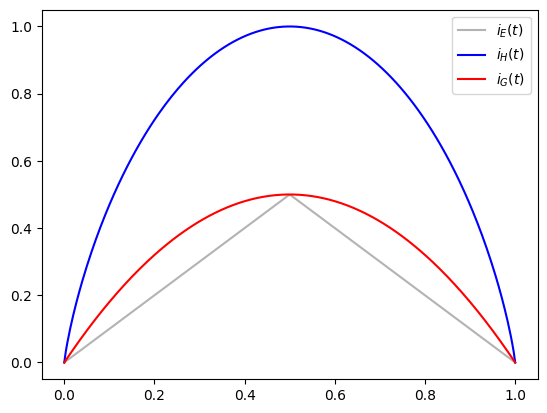

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

blue = (0, 0, 1.0)
red = (1.0, 0, 0)
gray = (0.7, 0.7, 0.7)


# Criterion

def impurity_error(p1, p2):
    return min(p1, p2)


def impurity_entropy(p1, p2):
    if p1 == 0.0 or p1 == 1.0 or p2 == 0.0 or p2 == 1.0:
        return 0.0
    else:
        return -(p1 * np.log2(p1) + p2 * np.log2(p2))


def impurity_gini(p1, p2):
    return p1 * (1 - p1) + p2 * (1 - p2)


fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0.0, 1.0, num=300)
# ax.plot(x, map(impurity, x, 1-x), label="entropy", color=blue)
ax.plot(x, list(map(impurity_error, x, 1 - x)), label="$i_E(t)$", color=gray)
ax.plot(x, list(map(impurity_entropy, x, 1 - x)), label="$i_H(t)$", color=blue)
ax.plot(x, list(map(impurity_gini, x, 1 - x)), label="$i_G(t)$", color=red)
ax.legend(loc="best")
plt.show()




# What is piecewise constant approximation?
1. Piecewise constant approximation (also known as piecewise constant function approximation) is a technique used in machine learning and signal processing to approximate a complex function by dividing it into several smaller, simpler functions called "pieces". Each piece is a constant function that approximates the original function within a specific range of input values.
2. For example, if the original function is a smooth curve, the piecewise constant approximation can approximate it by dividing the input range into several intervals and fitting a constant value to each interval. This results in a piecewise constant function that is a stepwise approximation of the original function, with each piece approximating the original function within its corresponding interval.
3. Piecewise constant approximation is often used in decision tree algorithms to approximate the target function using a tree structure, where each leaf node represents a piece of the piecewise constant function. This allows the decision tree to approximate complex functions by dividing them into smaller and simpler pieces that can be learned and predicted more accurately.
4. Overall, piecewise constant approximation is a technique used to approximate complex functions by dividing them into smaller and simpler pieces that can be learned and predicted more accurately. It is often used in decision tree algorithms to approximate the target function using a tree structure

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")


In [3]:
# create the random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1))
y = np.sin(X).ravel()

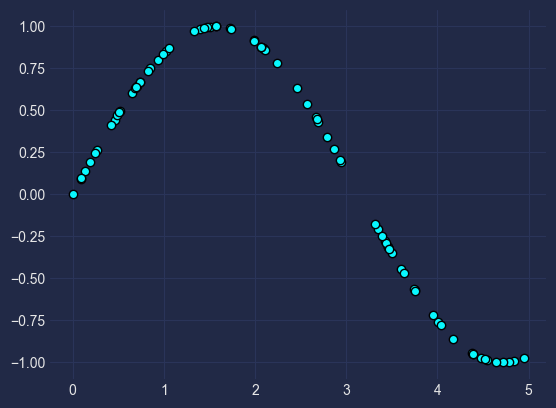

In [4]:
plt.scatter(X, y, edgecolors='k')

In [5]:
# adding some noise to the data
y[::5] += 3 * (0.5 - rng.rand(16))

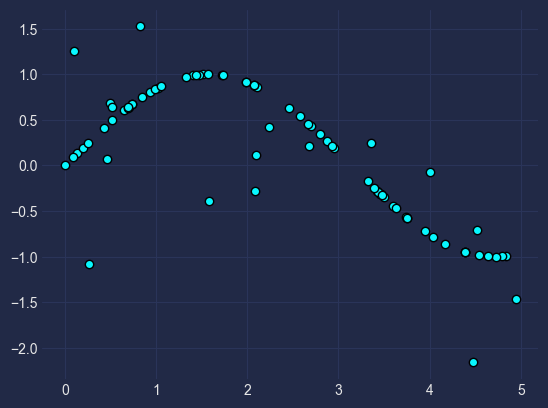

In [6]:
plt.scatter(X, y, edgecolors="k")
plt.show()

In [7]:
from sklearn.tree import DecisionTreeRegressor

# fit the model
regr_2 = DecisionTreeRegressor(max_depth=2).fit(X, y)
regr_5 = DecisionTreeRegressor(max_depth=5).fit(X, y)

In [8]:
# predict
X_test = np.arange(start=0, stop=5, step=0.01)[:, np.newaxis]
y_2 = regr_2.predict(X_test)
y_5 = regr_5.predict(X_test)

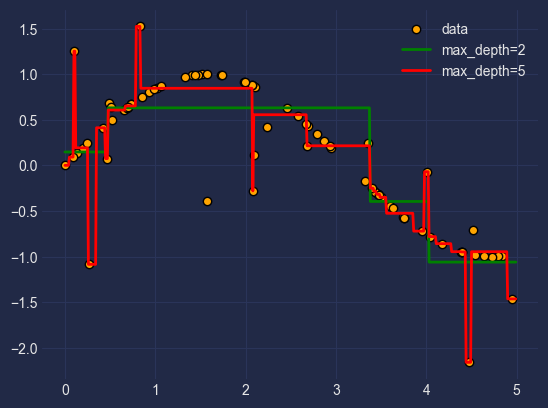

In [9]:
plt.scatter(X, y, edgecolors="k", c="orange", label="data")
plt.plot(X_test, y_2, c="g", lw=2, label="max_depth=2")
plt.plot(X_test, y_5, c="r", lw=2, label="max_depth=5")
plt.legend()
plt.show()

5. in particular interval the decision predict of constant value for all the value in that interval.
6. if we increase the depth the decision tree can learn fine details ie complex pattern in the data, so when depth increase, decision always tend to overfit to training data.

In [10]:
from sklearn.tree import export_graphviz, export_text
from sklearn import tree
import graphviz

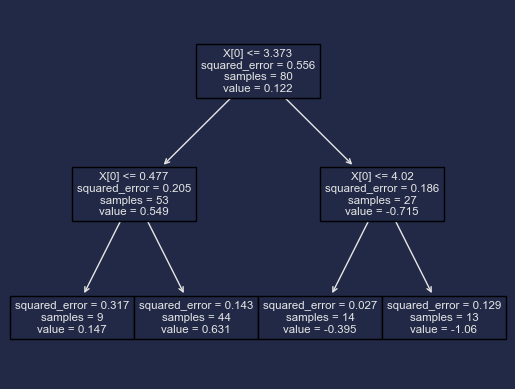

In [11]:
tree.plot_tree(regr_2)
plt.show()

In [12]:
print(export_text(regr_2))

|--- feature_0 <= 3.37
|   |--- feature_0 <= 0.48
|   |   |--- value: [0.15]
|   |--- feature_0 >  0.48
|   |   |--- value: [0.63]
|--- feature_0 >  3.37
|   |--- feature_0 <= 4.02
|   |   |--- value: [-0.40]
|   |--- feature_0 >  4.02
|   |   |--- value: [-1.06]



# Understanding the decision tree


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [14]:
# loading the data and splitting the data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# training the model
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

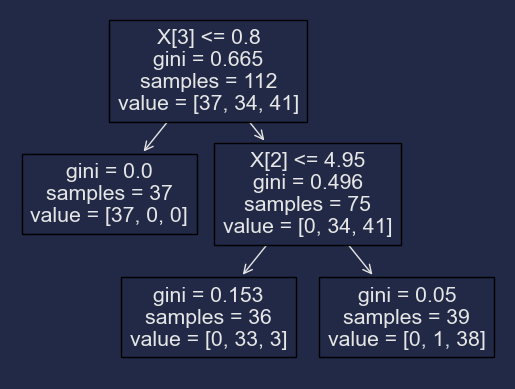

In [16]:
tree.plot_tree(clf)
plt.show()

In [17]:
tree_ = clf.tree_
list(filter(lambda ele: not str(ele).startswith("_"), dir(tree_)))

['apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'compute_partial_dependence',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_leaves',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

In [18]:
tree_.capacity

5

In [19]:
print(tree_.children_left)

[ 1 -1  3 -1 -1]


In [20]:
print(tree_.children_right)

[ 2 -1  4 -1 -1]


In [21]:
tree_.impurity

array([0.66470026, 0.        , 0.49564444, 0.15277778, 0.04996713])

In [22]:
tree_.threshold

array([ 0.80000001, -2.        ,  4.95000005, -2.        , -2.        ])

In [23]:
tree_.value

array([[[37., 34., 41.]],

       [[37.,  0.,  0.]],

       [[ 0., 34., 41.]],

       [[ 0., 33.,  3.]],

       [[ 0.,  1., 38.]]])

In [24]:
tree_.n_node_samples
#? no of sample at each node

array([112,  37,  75,  36,  39], dtype=int64)

In [25]:
tree_.node_count
#? no of node in the tree

5

In [26]:
tree_.feature
#? which feature is used ot split the node

array([ 3, -2,  2, -2, -2], dtype=int64)

In [27]:
node_depth = np.zeros(shape=tree_.node_count, dtype=np.int8)
is_leaves = np.zeros(shape=tree_.node_count, dtype=bool)
stack = [(0, 0)]
while stack:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    is_split_node = tree_.children_right[node_id] != tree_.children_left[node_id]
    if is_split_node:
        stack.append((tree_.children_left[node_id], depth + 1))
        stack.append((tree_.children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

In [28]:
node_depth

array([0, 1, 1, 2, 2], dtype=int8)

In [29]:
is_leaves

array([False,  True, False,  True,  True])

In [30]:
feature_names = load_iris().feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
print(f"The Binary tree has {tree_.node_count} node and the depth of the tree is {tree_.max_depth}.")
print("It has the following tree structure.")
for i in range(tree_.node_count):
    if is_leaves[i]:
        print(f'{node_depth[i] * "    "}node={i} is a terminal node.')
    else:
        print(
            f'{node_depth[i] * "    "}node={i} is a internal node:go to node {tree_.children_left[i]} if X[:,{tree_.feature[i]}]({feature_names[tree_.feature[i]]}) <= {tree_.threshold[i]} else goto to node {tree_.children_right[i]}  ')

The Binary tree has 5 node and the depth of the tree is 2.
It has the following tree structure.
node=0 is a internal node:go to node 1 if X[:,3](petal width (cm)) <= 0.800000011920929 else goto to node 2  
    node=1 is a terminal node.
    node=2 is a internal node:go to node 3 if X[:,2](petal length (cm)) <= 4.950000047683716 else goto to node 4  
        node=3 is a terminal node.
        node=4 is a terminal node.


In [32]:
node_indicator = clf.decision_path(X_test)
type(node_indicator)

scipy.sparse._csr.csr_matrix

In [33]:
clf.apply(X_test)

array([4, 3, 1, 4, 1, 4, 1, 3, 3, 3, 4, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3,
       1, 1, 3, 1, 1, 3, 3, 1, 4, 3, 1, 3, 4, 3, 1, 4], dtype=int64)

In [34]:
sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
             node_indicator.indptr[sample_id]: node_indicator.indptr[sample_id + 1]
             ]


In [35]:
node_index

array([0, 2, 4], dtype=int32)

In [36]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
             node_indicator.indptr[sample_id]: node_indicator.indptr[sample_id + 1]
             ]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, tree_.feature[node_id]] <= tree_.threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=tree_.feature[node_id],
            value=X_test[sample_id, tree_.feature[node_id]],
            inequality=threshold_sign,
            threshold=tree_.threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)


# Imbalanced Data

In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, weights=[0.95, 0.05], random_state=1)

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf_gini.fit(X, y)
clf_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

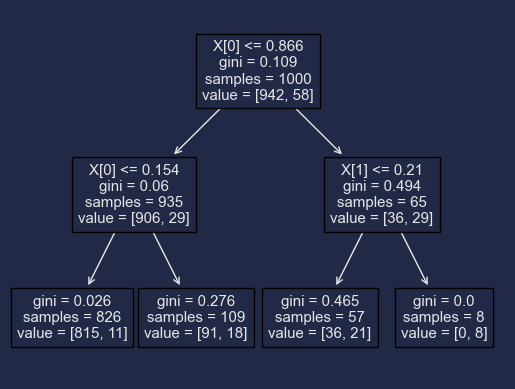

In [39]:
from sklearn import tree

tree.plot_tree(clf_gini)
plt.show()

In [40]:
from sklearn.metrics import f1_score

f1_score(y, clf_gini.predict(X))

0.2424242424242424

In [41]:
f1_score(y, clf_entropy.predict(X))

0.30985915492957744

In [42]:
1 - np.sum(np.square(np.divide(np.bincount(y), len(y))))

0.10927200000000004

In [43]:
1 - ((np.bincount(y) / len(y)) ** 2).sum()

0.10927200000000004

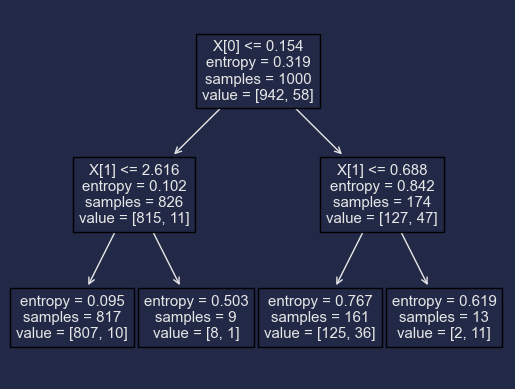

In [44]:
tree.plot_tree(clf_entropy)
plt.show()

In [45]:
gini_tree = clf_gini.tree_
type(gini_tree)

sklearn.tree._tree.Tree

In [46]:
gini_tree.node_count

7

In [47]:
print(gini_tree.impurity)

[0.109272   0.0601081  0.02627969 0.27573437 0.49420118 0.46537396
 0.        ]


In [48]:
print(gini_tree.children_left)

[ 1  2 -1 -1  5 -1 -1]


In [49]:
print(gini_tree.children_right)

[ 4  3 -1 -1  6 -1 -1]


In [50]:
gini_tree.value.squeeze()

array([[942.,  58.],
       [906.,  29.],
       [815.,  11.],
       [ 91.,  18.],
       [ 36.,  29.],
       [ 36.,  21.],
       [  0.,   8.]])

In [51]:
from sklearn.tree._tree import Tree


def get_information_gain(complete_tree: Tree):
    information_gain = []
    impurity = complete_tree.impurity
    left_children = complete_tree.children_left
    right_children = complete_tree.children_right
    sample = complete_tree.n_node_samples
    for node_idx in range(complete_tree.node_count):
        #check that node is internal code
        left_children_idx = left_children[node_idx]
        right_children_idx = right_children[node_idx]
        if left_children_idx != right_children_idx:
            parent_impurity = impurity[node_idx]
            left_child_impurity = impurity[left_children_idx]
            right_child_impurity = impurity[right_children_idx]
            ig = (parent_impurity - ((sample[left_children_idx] / sample[node_idx]) * left_child_impurity) - (
                    (sample[right_children_idx] / sample[node_idx]) * right_child_impurity))
            information_gain.append(ig)
        else:
            information_gain.append(-1)
    return information_gain

In [52]:
print(f"{'Gini':10}", get_information_gain(clf_entropy.tree_))
print(f"{'Entropy':10}", get_information_gain(clf_entropy.tree_))

Gini       [0.08871069522475836, 0.0023117083316722123, -1, -1, 0.0859441767596067, -1, -1]
Entropy    [0.08871069522475836, 0.0023117083316722123, -1, -1, 0.0859441767596067, -1, -1]


In [53]:
from sklearn.utils.class_weight import compute_class_weight

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_classes=2, random_state=1)

class_weight = compute_class_weight("balanced", classes=np.unique(y), y=y)
clf_balanced_gini = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf_balanced_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf_balanced_gini.fit(X, y)
clf_balanced_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

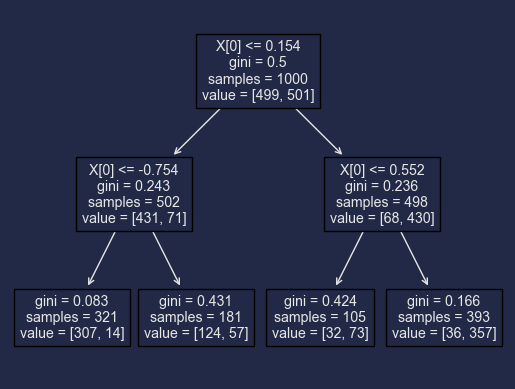

In [54]:
tree.plot_tree(clf_balanced_gini)
plt.show()

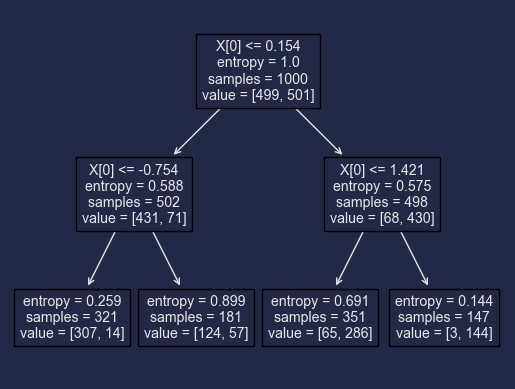

In [55]:
tree.plot_tree(clf_balanced_entropy)
plt.show()

In [56]:
print(f"{'Gini':10}", get_information_gain(clf_balanced_gini.tree_))
print(f"{'Entropy':10}", get_information_gain(clf_balanced_entropy.tree_))

Gini       [0.26065194646314344, 0.03394038037483166, -1, -1, 0.015120282384723183, -1, -1]
Entropy    [0.4184192218355275, 0.09855083254093361, -1, -1, 0.045461992969663245, -1, -1]


In [57]:
print(f"For Balanced Data:")
print(f"{'Gini':10}", get_information_gain(clf_balanced_gini.tree_))
print(f"{'Entropy':10}", get_information_gain(clf_balanced_entropy.tree_))
print(f"For Imbalanced Data:")
print(f"{'Gini':10}", get_information_gain(clf_gini.tree_))
print(f"{'Entropy':10}", get_information_gain(clf_entropy.tree_))

For Balanced Data:
Gini       [0.26065194646314344, 0.03394038037483166, -1, -1, 0.015120282384723183, -1, -1]
Entropy    [0.4184192218355275, 0.09855083254093361, -1, -1, 0.045461992969663245, -1, -1]
For Imbalanced Data:
Gini       [0.020947853558206532, 0.004747595567261356, -1, -1, 0.08610401744004981, -1, -1]
Entropy    [0.08871069522475836, 0.0023117083316722123, -1, -1, 0.0859441767596067, -1, -1]


When using the entropy as the purity measure in a decision tree, you may find that some splits result in higher information gain than others. This is because the entropy is a more sensitive measure of impurity than other measures, such as the Gini index. This means that it is more likely to detect small differences in the purity of the data, and therefore the splits that are made using the entropy as the purity measure may be more effective at reducing the impurity of the data

## How entropy can detect the small difference in the purity of the data?
Gini is consistently lower than entropy. Therefore, it penalizes less small impurities. This is a crucial observation that will prove helpful in the context of imbalanced datasets.

In [58]:
def gini(p1, p2):
    return 1 - np.sum(np.square(np.array([p1, p2])))


def entropy(p1, p2):
    if p1 == 0.0 or p1 == 1.0 or p2 == 0.0 or p2 == 1.0:
        return 0.0
    return -p1 * np.log2(p1) - p2 * np.log2(p2)


x = np.linspace(0.0, 1.0, 300)

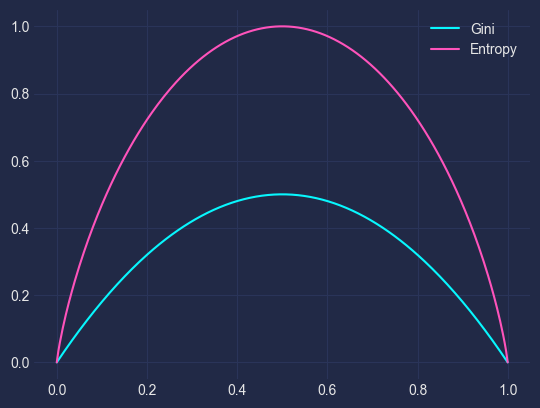

In [59]:
plt.plot(x, list(map(gini, x, 1 - x)), label="Gini")
plt.plot(x, list(map(entropy, x, 1 - x)), label="Entropy")
plt.legend()
plt.show()

In this plot we can see gini penalise less for the small impurity compare to the entropy .Thus entropy can detect the smaller impurity in the data compare to the gini. This make entropy can make better split  than gini which make them less susceptible to imbalance.This also make split to gain more information about Y when they are splitting the internal node.



# what are the advantages using the Gini as the impurity measure than the entropy?

One advantage of the Gini index is that it is computationally simpler to calculate than the entropy. The Gini index is calculated as the sum of the squared probabilities of each class in a given dataset, whereas the entropy is calculated using the logarithmic function, which can be more computationally expensive to evaluate.

Another advantage of the Gini index is that it is less sensitive to changes in the data than the entropy. Because the Gini index is calculated using the squared probabilities of each class, it is less affected by small changes in the proportions of the classes in the data. This can make the Gini index more stable and easier to interpret than the entropy.

For example, consider a dataset with two classes, A and B, where the proportions of the classes are 70% A and 30% B. The Gini index for this dataset can be calculated as follows:

```
Gini = (0.7 * 0.3) + (0.3 * 0.7) = 0.21
Entropy = -(0.7 * log2(0.7)) - (0.3 * log2(0.3)) = 0.881
```

Now, let's say that the proportions of the classes in the dataset change slightly, to 71% A and 29% B. The Gini index for this new dataset can be calculated as follows:

```
Gini = (0.71 * 0.29) + (0.29 * 0.71) = 0.2049
Entropy = -(0.71 * log2(0.71)) - (0.29 * log2(0.29)) = 0.874
```



In general, the Gini index is a good choice for a measure of impurity in a decision tree when computational efficiency and stability are important considerations. However, the entropy may be a better choice in some situations, such as when the data is highly unbalanced or when the goal is to maximize the information gain of the splits in the decision tree

# Pruning

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [61]:
X, y = load_breast_cancer(return_X_y=Tree)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0, max_depth=2)

In [62]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

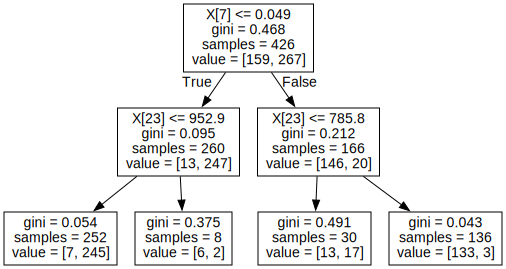

In [63]:
import graphviz

clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None)
graphviz.Source(dot_data)

In [64]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.018988   0.03422475 0.32729844]


In [65]:
print(impurities)

[0.08735233 0.10634033 0.14056508 0.46786352]


In [66]:
def get_leave_idx(complete_tree: Tree):
    return [node_idx for node_idx in range(complete_tree.node_count)
            if complete_tree.children_left[node_idx] == complete_tree.children_right[node_idx]]

In [67]:
def cost_complexity_measure(complete_tree: Tree, leaf_idx_):
    # find the terminal node index in the tree
    # leaf_idx_ = get_leave_idx(complete_tree)

    # find the total sample in each terminal nodes
    leaf_sample_ = np.take(complete_tree.n_node_samples,
                           leaf_idx_)
    # weighted sample of terminal node
    leaf_weighted_sample_ = np.divide(leaf_sample_,
                                      complete_tree.n_node_samples[0]  # root node contain all sample
                                      )
    # find the impurity in each terminal node
    leaf_impurity_ = np.take(complete_tree.impurity,
                             leaf_idx_)

    # total sample weighted impurity of the terminal node in the Tree R(T)
    misclassification_rate = np.dot(leaf_weighted_sample_, leaf_impurity_)
    return misclassification_rate

In [68]:
(
    cost_complexity_measure(clf.tree_, [2, 3, 5, 6]),  # Terminal node in the Original Tree
    cost_complexity_measure(clf.tree_, [1, 5, 6]),  # Terminal node after pruning the [2,3] node.
    cost_complexity_measure(clf.tree_, [2, 3, 4]),  # Terminal node after pruning the [5,6] node.
    cost_complexity_measure(clf.tree_, [1, 4]),  # Terminal node after pruning the [2, 3, 5, 6] node.
    cost_complexity_measure(clf.tree_, [0])  # Root as terminal node
)
#! In this tree which contain the 3 terminal has two possibility , we compute cost_complexity_measure for both possibility, finally we only select the on possibility which has minimum cost_complexity_measure.

#? here [1,5,6] has minimum cost compare to the [2,3,4]
#? that why sklearn impurity has 0.1063 not having the 0.1215

(0.08735232747246006,
 0.10634032955905368,
 0.12157707512365581,
 0.14056507721024944,
 0.46786351914302715)

In [69]:
print(f"{'Cost Complexity Measure ':30}",impurities)
print(f"{'Cost Complexity parameter ':30}",ccp_alphas)

Cost Complexity Measure        [0.08735233 0.10634033 0.14056508 0.46786352]
Cost Complexity parameter      [0.         0.018988   0.03422475 0.32729844]


ccp_alphas are the effective alpha which is used to find the `weakest link` in the tree.
the node with effective alpha will be pruned first.
0 means no pruning
1 means all the node will be pruned except the root.


In [70]:
clf_prune = DecisionTreeClassifier(ccp_alpha=1)
clf_prune.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=1)

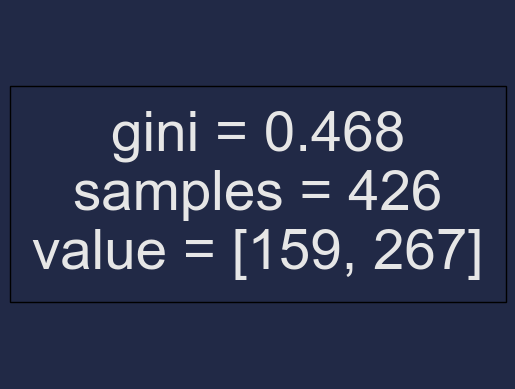

In [71]:
tree.plot_tree(clf_prune)
plt.show()

we need to choose the right ccp_alpha to prune the weakest link from the tree.
As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [72]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas , impurities = path.ccp_alphas ,path.impurities

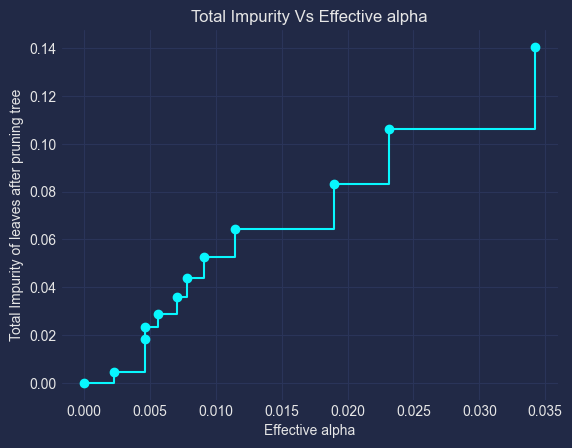

In [73]:
plt.title("Total Impurity Vs Effective alpha")
plt.ylabel("Total Impurity of leaves after pruning tree")
plt.xlabel("Effective alpha")
plt.plot(ccp_alphas[:-1],impurities[:-1],marker="o",drawstyle="steps-post")
plt.show()

In [74]:
#? we train the decision tree with these effective alpha
clfs = [DecisionTreeClassifier(random_state=0,ccp_alpha=eff_alpha).fit(X_train,y_train)
        for eff_alpha in ccp_alphas[:-1] # since last alpha remove the all the node so w removed it
        ]


## Node vs effective alpha

As the effective alpha increase the number of node will decrease, because as the alpha increase more node get pruned.

In [75]:
node_counts = [clf.tree_.node_count
               for clf in clfs]
depth = [clf.tree_.max_depth
         for clf in clfs]

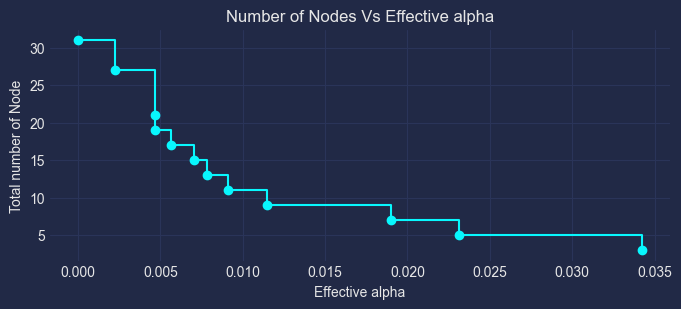

In [76]:
plt.figure(figsize=(8,3))
plt.title("Number of Nodes Vs Effective alpha")
plt.ylabel("Total number of Node")
plt.xlabel("Effective alpha")
plt.plot(ccp_alphas[:-1],node_counts,marker="o",drawstyle="steps-post")
plt.show()

## Depth vs effective alpha

As the effective alpha increase the depth of the tree will decrease, because as the alpha increase more node get pruned.

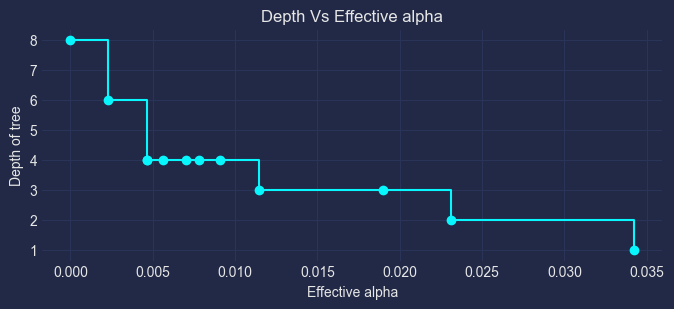

In [77]:
plt.figure(figsize=(8,3))
plt.title("Depth Vs Effective alpha")
plt.ylabel("Depth of tree")
plt.xlabel("Effective alpha")
plt.plot(ccp_alphas[:-1],depth,marker="o",drawstyle="steps-post")
plt.show()

## Accuracy during the training and testing

In [78]:
train_accuracy = [clf.score(X_train,y_train)
                  for clf in clfs]
test_accuracy = [clf.score(X_test,y_test)
                 for clf in clfs]

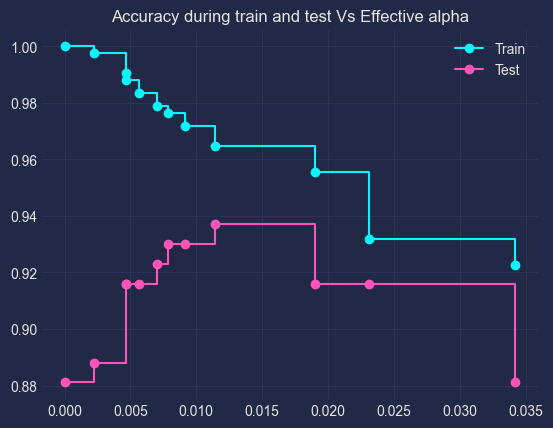

In [79]:
plt.title("Accuracy during train and test Vs Effective alpha")
plt.plot(ccp_alphas[:-1],train_accuracy,marker="o",drawstyle="steps-post",label="Train")
plt.plot(ccp_alphas[:-1],test_accuracy,marker="o",drawstyle="steps-post",label="Test")
plt.legend()
plt.show()

Observation:
1. When the `ccp_alpha = 0` when train accuracy is 100% and test accuracy is 88% .This clearly show that model is overfit.This is due to all the terminal node in tree will be pure node.
2. As the ccp_alpha increase , node get pruned ,and some impurity in the terminal , thus train accuracy decrease,but the test accuracy is increased.Thus model capturing the data not the noise in the data.
3. When the `ccp_alphas = 0.015` the test accuracy is maximised.Thus model generalized well for unseen data.

# Non Linear data

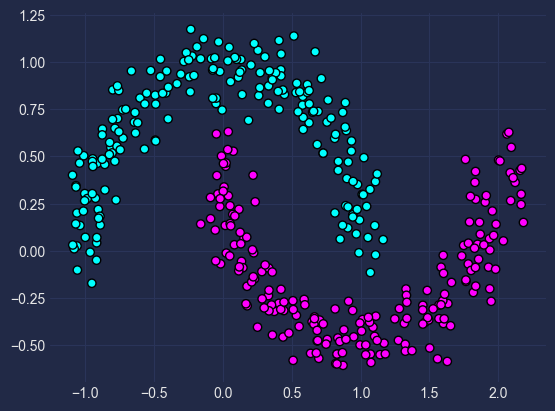

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.1,random_state=2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolors="k")
plt.show()

In [81]:
clf_moon =DecisionTreeClassifier(random_state=0)

In [82]:
path = clf_moon.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = path.ccp_alphas[:-1],path.impurities[:-1]

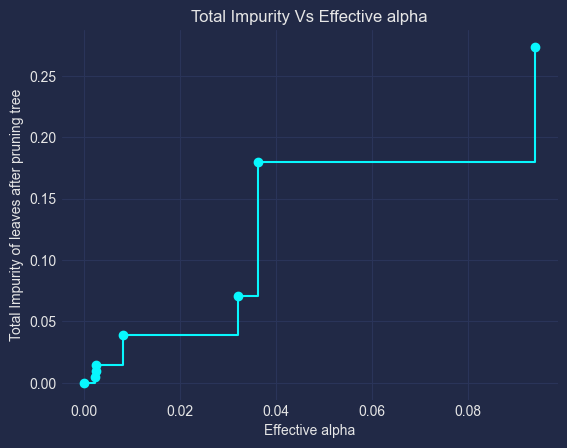

In [83]:
plt.title("Total Impurity Vs Effective alpha")
plt.ylabel("Total Impurity of leaves after pruning tree")
plt.xlabel("Effective alpha")
plt.plot(ccp_alphas,impurities,marker="o",drawstyle="steps-post")
plt.show()

In [84]:
clfs = [DecisionTreeClassifier(ccp_alpha=eff_alpha).fit(X_train,y_train)
        for eff_alpha in ccp_alphas]

In [85]:
node_counts = [clf.tree_.node_count
               for clf in clfs]
depth = [clf.tree_.max_depth
         for clf in clfs]

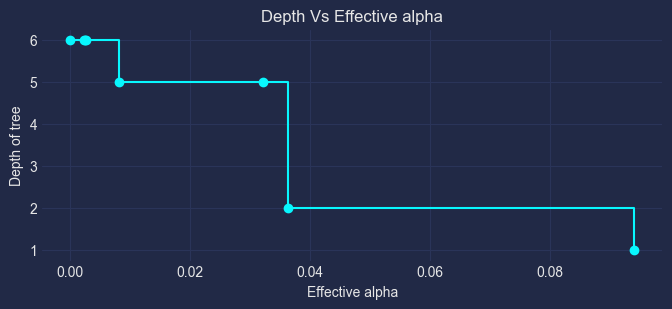

In [86]:
plt.figure(figsize=(8,3))
plt.title("Depth Vs Effective alpha")
plt.ylabel("Depth of tree")
plt.xlabel("Effective alpha")
plt.plot(ccp_alphas,depth,marker="o",drawstyle="steps-post")
plt.show()

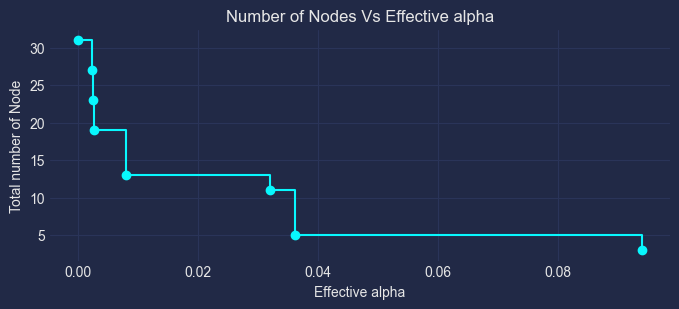

In [87]:
plt.figure(figsize=(8,3))
plt.title("Number of Nodes Vs Effective alpha")
plt.ylabel("Total number of Node")
plt.xlabel("Effective alpha")
plt.plot(ccp_alphas,node_counts,marker="o",drawstyle="steps-post")
plt.show()

In [88]:
from sklearn.metrics import f1_score
train_accuracy = [f1_score(y_train,clf.predict(X_train))
                  for clf in clfs]
test_accuracy = [f1_score(y_test,clf.predict(X_test))
                 for clf in clfs]

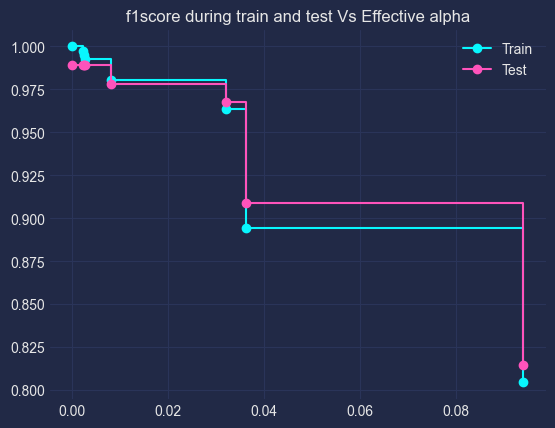

In [89]:
plt.title("f1score during train and test Vs Effective alpha")
plt.plot(ccp_alphas,train_accuracy,marker="o",drawstyle="steps-post",label="Train")
plt.plot(ccp_alphas,test_accuracy,marker="o",drawstyle="steps-post",label="Test")
plt.legend()
plt.show()

# What are the common strategies for dealing with continuous variables in decision trees?
1. When dealing with continuous variables in decision trees, one common strategy is to bin the values into discrete intervals or bins, and treat the bins as categorical variables. This can be done using various binning methods, such as equal-width binning, equal-frequency binning,
2. Equal-width binning divides the range of the variable into a fixed number of bins of equal size,
3. Equal-frequency binning divides the data into a fixed number of bins such that each bin contains the same number of samples. Entropy-based binning.
4. Another common strategy for dealing with continuous variables in decision trees is to use a splitting criterion that is specifically designed for continuous variables, such as the Gini index or the entropy. These criteria can handle continuous variables directly, without the need to bin the data into discrete intervals.


## Equal width binning

Convert the continuous data into discrete data by dividing the continuous data with equal bin width.


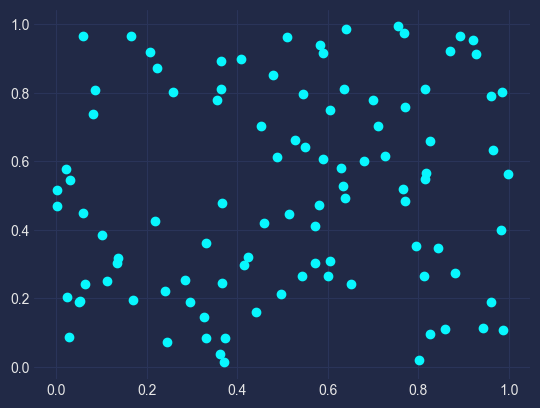

In [90]:
rnd = np.random.RandomState(5)
cnt_data = rnd.rand(100,2)
plt.scatter(cnt_data[:,0],cnt_data[:,1])
plt.show()

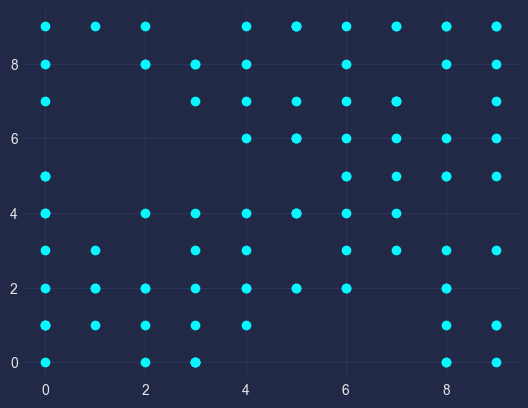

In [91]:
from sklearn.preprocessing import KBinsDiscretizer
eq_bin_width_discretizer = KBinsDiscretizer(n_bins=10, strategy="uniform", encode="ordinal", random_state=rnd)
dis_data_eq_bin_width = eq_bin_width_discretizer.fit_transform(cnt_data)
plt.scatter(dis_data_eq_bin_width[:, 0], dis_data_eq_bin_width[:, 1])
plt.show()

In [92]:
print(eq_bin_width_discretizer.bin_edges_[0])

[0.00164217 0.1012005  0.20075883 0.30031716 0.39987549 0.49943382
 0.59899215 0.69855048 0.79810881 0.89766714 0.99722547]


In [93]:
width = np.diff(eq_bin_width_discretizer.bin_edges_[0])
print(width)
#? all the bin width are equal

[0.09955833 0.09955833 0.09955833 0.09955833 0.09955833 0.09955833
 0.09955833 0.09955833 0.09955833 0.09955833]


In [94]:
unique , counts = np.unique(dis_data_eq_bin_width[:,0],return_counts=True)
print(f"{'unique element :':25}{unique}")
print(f"{'counts of elements :':25}{counts}")
with np.printoptions(suppress=True,precision=4):
    print(f"{'width of bin :':25}{width}")

unique element :         [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
counts of elements :     [14  5  8 11  9 12 10  9 12 10]
width of bin :           [0.0996 0.0996 0.0996 0.0996 0.0996 0.0996 0.0996 0.0996 0.0996 0.0996]


## Equal Frequency binning

Now each bin will have same number of sample

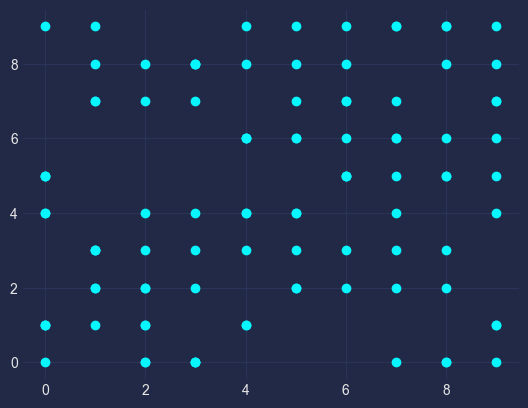

In [95]:
eq_freq_discretizer = KBinsDiscretizer(n_bins=10,strategy="quantile",encode="ordinal")
dis_data_eq_freq = eq_freq_discretizer.fit_transform(cnt_data)
plt.scatter(dis_data_eq_freq[:,0],dis_data_eq_freq[:,1])

In [96]:
width = np.diff(eq_freq_discretizer.bin_edges_[0])
unique , counts = np.unique(dis_data_eq_freq[:,0],return_counts=True)
print(f"{'unique element :':25}{unique}")
print(f"{'counts of elements :':25}{counts}")
with np.printoptions(suppress=True,precision=4):
    print(f"{'width of bin :':25}{width}")

unique element :         [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
counts of elements :     [10 10 10 10 10 10 10 10 10 10]
width of bin :           [0.0614 0.1531 0.1318 0.072  0.1144 0.0671 0.1014 0.1104 0.0826 0.1014]
